For our research project, we wanted to toy with data related to music. After some consideration, we decided to attempt a prediciton of next months top 200 songs on spotify from a list of upcoming albums. As it stands, we are going to synthesise a few different metrics for our final prediction. We plan to analyze the artists previous history of top 200 songs and create a function that weights the artists likely hood of being in the top 200 songs by the longevity of previous songs on the chart. We also plan to look at twitter for chatter about the upcoming album. This data will be saved for the next iteration of the project.

Below is some code to import the necessary modules. The modules are used for the data processing and visualization portions of the notebook.

In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt

The data on upcoming albums was scraped from a website called "consequenceofsound". The code for the scraping is included in another notebook titled "New Release Data". The notebook clearly outlines the process. The gist of the process was to use BeautifulSoup to scrape the site for albums within about a two month range. We chose May and June as the months were going to make predictions for inorder to check the results of the predictions not too far down the road. On top of this, we believe that these sorts of preidcitons are quite volatile and attempting to make predictions far in the future would be futile.

The data for the top 200 charts was scraped from the website "spotifycharts.com". The code for the scraping is inlcuded in another notebook titled "Make Top 200 Table". Scraping this data was a little more involved than the prevoius scrape job. The process begins by using BeautifulSoup to retrieve the dates for all the available charts. Next, a bash script was used to update the website url to download a chart per date. The wget function was used for this. Finally, using pandas the data was synthesized into one large chart. 

The preprocessing, for these datasets, was completed in the notebooks mentioned above. Some of the cleaning that needed to be done inlcuded removing artifacts caused by switching the coding system from Latin1 to UTF-8. There were issues with whitespace before and after entries. The spotify charts website inlcuded more metadata than we needed, which needed to be removed. It's worth checking out the other notebooks for more details regarding the preprocessing process.

In [2]:
new_albums = pd.read_csv("new_albums.csv")
top_200 = pd.read_csv("top_200_table.csv",sep="\t",index_col = 0)
del new_albums["Unnamed: 0"]

Below is a peak into the data files. This is clean data but still difficult to work with. In a seperate notebook the top 200 chart is reworked to make the analysis easier. This will be discussed shortly.

In [3]:
new_albums.head()

,albums,artists
0,Trident Death Rattle EP,Twilight
1,DOVE,Belly
2,Nothing Matters,Benjamin Lazar Davis
3,Songs in the Key of Funk,Big Sam’s Funky Nation
4,Love in Wartime,Birds of Chicago


In [4]:
top_200.head()

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2018-04-18,2018-04-19,2018-04-20,2018-04-21,2018-04-22,2018-04-23,2018-04-24,2018-04-25,2018-04-26,2018-04-27
0,"1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Shape of You"",""Ed Sheeran"",1517787","1,""Shape of You"",""Ed Sheeran"",1437473","1,""Shape of You"",""Ed Sheeran"",1346146","1,""Shape of You"",""Ed Sheeran"",1532772","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...",...,"1,""Nice For What"",Drake,2784404","1,""Nice For What"",Drake,2704756","1,KOD,""J. Cole"",4233070","1,KOD,""J. Cole"",2537308","1,""Nice For What"",Drake,2232935","1,""Nice For What"",Drake,2494495","1,""Nice For What"",Drake,2545158","1,""Nice For What"",Drake,2369585","1,""Nice For What"",Drake,2351522","1,Paranoid,""Post Malone"",3694438"
1,"2,""Fake Love"",Drake,1180074","2,""Fake Love"",Drake,1076575","2,""Fake Love"",Drake,1171625","2,""Fake Love"",Drake,1179471","2,""Fake Love"",Drake,1179992","2,""Castle on the Hill"",""Ed Sheeran"",1472037","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","2,""Shape of You"",""Ed Sheeran"",1512685",...,"2,""God's Plan"",Drake,1801908","2,""God's Plan"",Drake,1787101","2,Photograph,""J. Cole"",3561388","2,""Nice For What"",Drake,2505932","2,KOD,""J. Cole"",1997552","2,KOD,""J. Cole"",2314828","2,KOD,""J. Cole"",2180639","2,KOD,""J. Cole"",1928183","2,KOD,""J. Cole"",1764366","2,""Better Now"",""Post Malone"",3467168"
2,"3,Starboy,""The Weeknd"",1064351","3,Starboy,""The Weeknd"",963602","3,Starboy,""The Weeknd"",1064931","3,Starboy,""The Weeknd"",1086272","3,Starboy,""The Weeknd"",1068015","3,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","3,""Fake Love"",Drake,1180717","3,""Fake Love"",Drake,1123166","3,""Fake Love"",Drake,1157963","3,""Fake Love"",Drake,1181414",...,"3,""I Like It"",""Cardi B"",1629604","3,""Psycho (feat. Ty Dolla $ign)"",""Post Malone""...","3,ATM,""J. Cole"",3408026","3,ATM,""J. Cole"",2223642","3,ATM,""J. Cole"",1771037","3,ATM,""J. Cole"",2065871","3,ATM,""J. Cole"",1805005","3,""Kevin’s Heart"",""J. Cole"",1623076","3,""God's Plan"",Drake,1611225","3,""Spoil My Night"",""Post Malone"",3318588"
3,"4,Closer,""The Chainsmokers"",1010492","4,Closer,""The Chainsmokers"",782423","4,Closer,""The Chainsmokers"",857394","4,Closer,""The Chainsmokers"",856349","4,Closer,""The Chainsmokers"",860364","4,""Fake Love"",Drake,1217137","4,""Castle on the Hill"",""Ed Sheeran"",1127503","4,Starboy,""The Weeknd"",933303","4,""Castle on the Hill"",""Ed Sheeran"",1016935","4,Starboy,""The Weeknd"",1022585",...,"4,""Psycho (feat. Ty Dolla $ign)"",""Post Malone""...","4,""I Like It"",""Cardi B"",1582355","4,Motiv8,""J. Cole"",3357778","4,Motiv8,""J. Cole"",2083997","4,""God's Plan"",Drake,1602919","4,Motiv8,""J. Cole"",1847631","4,""Kevin’s Heart"",""J. Cole"",1627749","4,""God's Plan"",Drake,1595052","4,""Kevin’s Heart"",""J. Cole"",1543022","4,Psycho,""Post Malone"",3171834"
4,"5,""Black Beatles"",""Rae Sremmurd"",874289","5,""Black Beatles"",""Rae Sremmurd"",733662","5,""Black Beatles"",""Rae Sremmurd"",769249","5,""I Don’t Wanna Live Forever (Fifty Shades Da...","5,""I Don’t Wanna Live Forever (Fifty Shades Da...","5,Starboy,""The Weeknd"",1083653","5,Starboy,""The Weeknd"",1002482","5,""Castle on the Hill"",""Ed Sheeran"",925352","5,Starboy,""The Weeknd"",990020","5,""Castle on the Hill"",""Ed Sheeran"",942521",...,"5,""Look Alive (feat. Drake)"",""BlocBoy JB"",1493428","5,""Look Alive (feat. Drake)"",""BlocBoy JB"",1482167","5,""Kevin’s Heart"",""J. Cole"",3200312","5,""Kevin’s Heart"",""J. Cole"",1994055","5,Motiv8,""J. Cole"",1598278","5,""Kevin

From the intial, raw spotify data, another chart was created that tracks a songs lifespan in the top 200. The rows of this new chart are dates in which a parituclar song is either on or off the charts and there is a column per song. The NaN value is used to denote a song not being on the chart.

In [19]:
song_tracker = pd.read_csv("song_tracker.csv",low_memory=False,na_values="NaN")
del song_tracker["Unnamed: 0"]
del song_tracker["infinity (888) - feat. Joey Bada$$"]

song_tracker = song_tracker[1:]
song_tracker = song_tracker.set_index(top_200.columns)
song_tracker.index = pd.to_datetime(song_tracker.index)
song_tracker.head()

,$$$ - with Matt Ox,'Till I Collapse,(Don't Fear) The Reaper,(Fuck A) Silver Lining,(I Can't Get No) Satisfaction - Mono Version / Remastered 2002,(Intro) I'm so Grateful,(Not) The One,(What A) Wonderful World - Remastered,...Baby One More Time - Recorded at Spotify Studios NYC,...Ready For It?,...,rockstar,santa monica & la brea,schizophrenia,she ready,the remedy for a broken heart (why am I so in love),top priority (with Ne-Yo),up in this (with Tinashe),wokeuplikethis*,Échame La Culpa,美女と野獣
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The table below shows the lifespan of Post Malone's song "Rockstar". The chart is a little confusing in that the lower the value the higher the song was on the chart. Immedietly following is a chart for the Migo's song "Bad and Boujee (feat. Lil Uzi Vert)"

Text(0,0.5,'Chart Position')

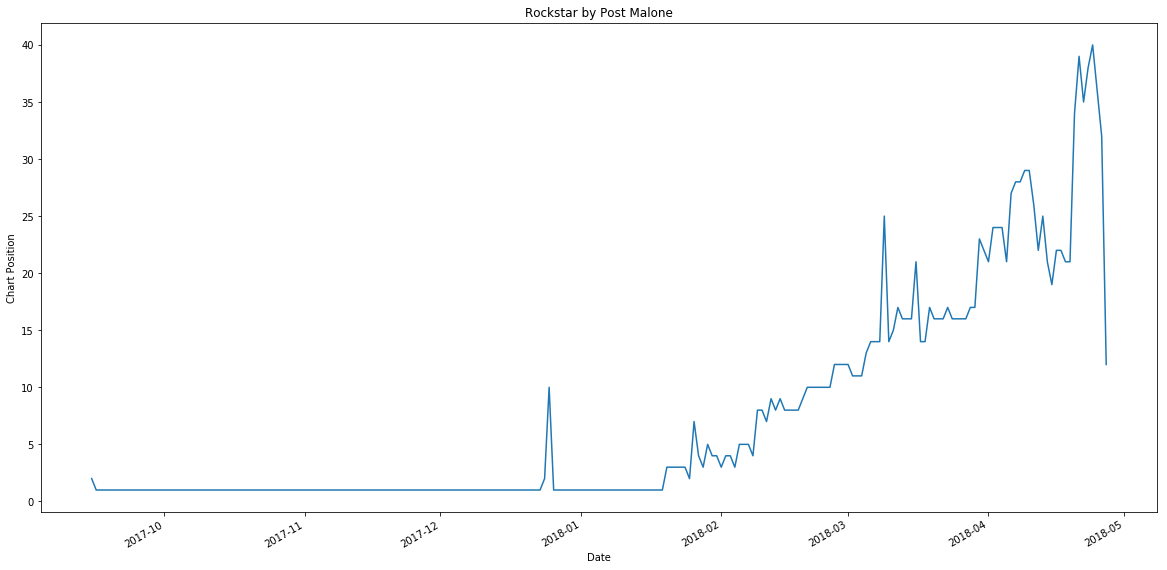

In [20]:
plot = song_tracker["rockstar"][1:].astype(float).plot(figsize=(20,10),title="Rockstar by Post Malone")
plot.set_xlabel("Date")
plot.set_ylabel("Chart Position")

Text(0,0.5,'Chart Position')

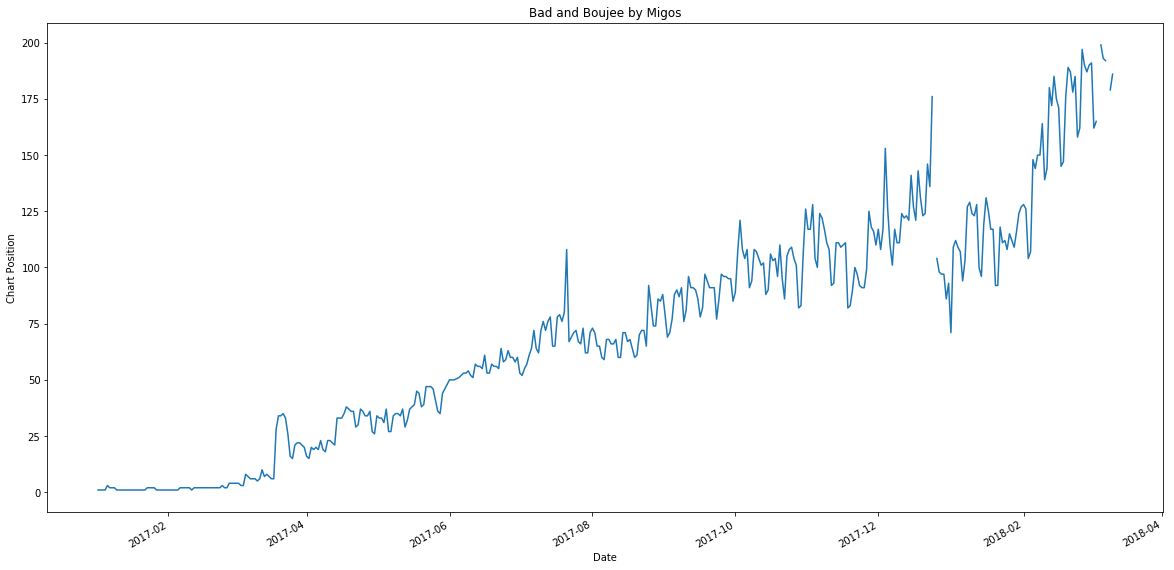

In [21]:
plot = song_tracker["Bad and Boujee (feat. Lil Uzi Vert)"][1:].astype(float).plot(figsize=(20,10),title="Bad and Boujee by Migos")
plot.set_xlabel("Date")
plot.set_ylabel("Chart Position")

It's clear that the lifespan of a popular song is quite long with a predictable decline in ranking as time goes on. Here are the two charts superimposed on each other. It gives you a little perspective into the misleadingness of charts!


Text(0,0.5,'Chart Position')

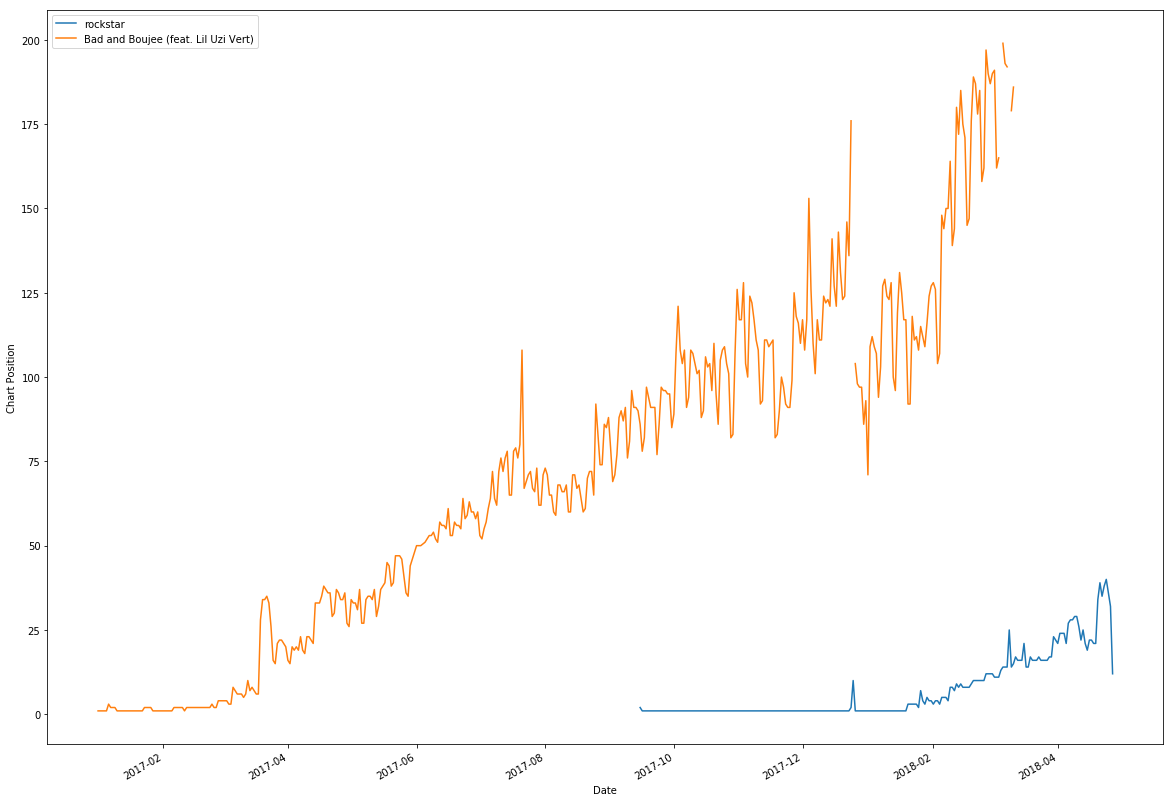

In [33]:
plot = song_tracker[["rockstar","Bad and Boujee (feat. Lil Uzi Vert)"]].astype(float).plot(figsize=(20,15))
plot.set_xlabel("Date")
plot.set_ylabel("Chart Position")